In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

from sklearn.model_selection import GridSearchCV

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/train_ctrUa4K.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
df.describe(include = "all")

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique              NaN                NaN         NaN               NaN   
top                 NaN                NaN         NaN               NaN   
freq                NaN                NaN         NaN               NaN   
mean        5403.459283        1621.245798  146.412162         342.00000   
std         6109.041673        2926.248369   85.587325          65.12041   
min          150.000000           0.000000    9.000000          12.00000   
25%         2877.500000           0.000000  100.000000         360.00000   
50%         3812.500000        1188.500000  128.000000         360.00000   
75%         5795.000000        2297.250000  168.000000         360.00000   
max        81000.000000       41667.000000  700.000000         480.00000   

        Credit_History Property_Area Loan_Status  
count       564.000000           614         614  
unique             NaN             3           2  
top                NaN     Semiurban           Y  
freq               NaN           233         422  
mean          0.842199           NaN         NaN  
std           0.364878           NaN         NaN  
min           0.000000           NaN         NaN  
25%           1.000000           NaN         NaN  
50%           1.000000           NaN         NaN  
75%           1.000000           NaN         NaN  
max           1.000000           NaN         NaN

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
round(df.isnull().sum()/df.shape[0]*100,3)

Loan_ID              0.000
Gender               2.117
Married              0.489
Dependents           2.443
Education            0.000
Self_Employed        5.212
ApplicantIncome      0.000
CoapplicantIncome    0.000
LoanAmount           3.583
Loan_Amount_Term     2.280
Credit_History       8.143
Property_Area        0.000
Loan_Status          0.000
dtype: float64

### **Implementing Pandas Profiling to Generate Profile Report**

In [8]:
## Install Pandas Profiling using this pip command

!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df,explorative=True,dark_mode=True)
#profile.to_file("output.html")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: >

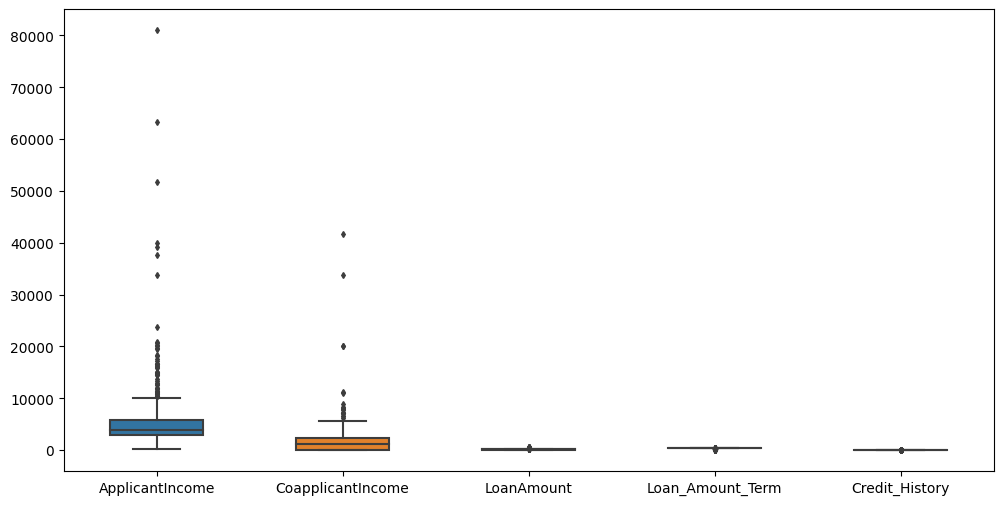

In [10]:
fig,ax = plt.subplots(figsize = (12,6))
sns.boxplot(data=df,width = 0.5,fliersize = 3,ax=ax)

In [11]:
# fill the missing values for numerical terms - mean

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
# fill the missing values for categorical terms - mode

df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.isnull().sum().sum()

0

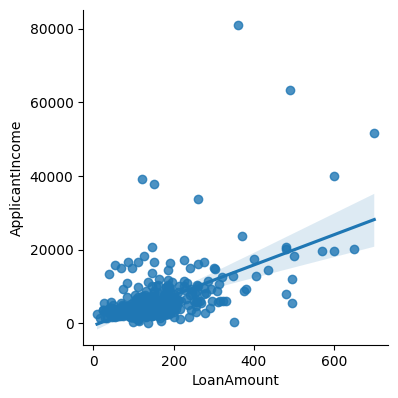

In [15]:
# Let's see hoq the sales are related with other variable using Scatter Plot

sns.pairplot(df,x_vars = ["LoanAmount"],y_vars = ["ApplicantIncome"],height=4,aspect =1,kind = "reg")
plt.show()

Graph represent Bivarient analysis(Comparing 2 variables at a time): Checking the relationship between the Loan Amount and Applicant Income. (Linearly Correlated: Higher the Applicant Income Higher the Loan Amount).

Most of the People are in 10,000 income and less then 20,000 Income.

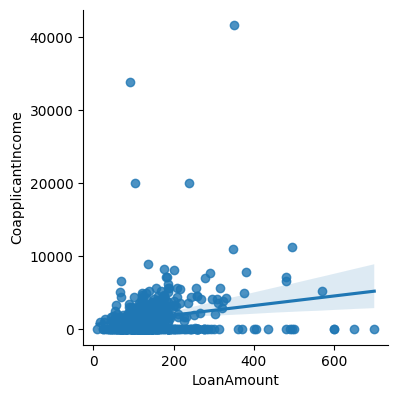

In [16]:
# Let's see hoq the sales are related with other variable using Scatter Plot

sns.pairplot(df,x_vars = ["LoanAmount"],y_vars = ["CoapplicantIncome"],height=4,aspect =1,kind = "reg")
plt.show()

Having linear relationship between Coapplicant and Loan Amount. 

In [17]:
# Total Income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

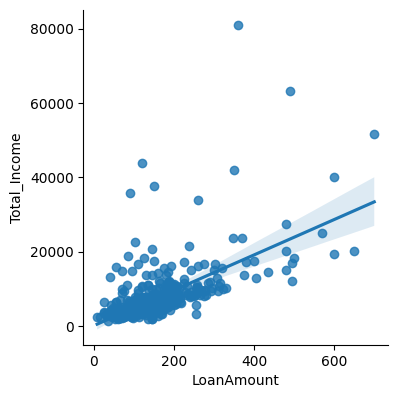

In [18]:
# Let's see hoq the sales are related with other variable using Scatter Plot

sns.pairplot(df,x_vars = ["LoanAmount"],y_vars = ["Total_Income"],height=4,aspect =1,kind = "reg")
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


### **Analyze one by one variable**

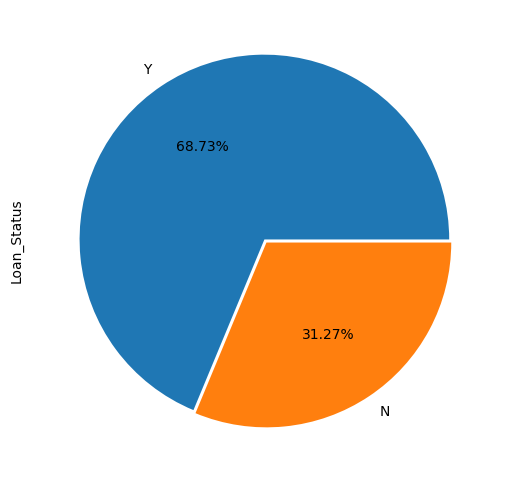

In [20]:
plt.figure(figsize=(6,6))
explode = [0.01,0.01]
df["Loan_Status"].value_counts().plot(kind = "pie",autopct = "%0.2f%%",explode=explode)
plt.show()

68% time Loan is getting Approved (Apploval rate of getting loan is 68%)

In [21]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

422 peoples Loan were Approved and

192 Poples Loan were Not Approved.

In [22]:
pd.crosstab(df.Gender,df.Loan_Status)

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347

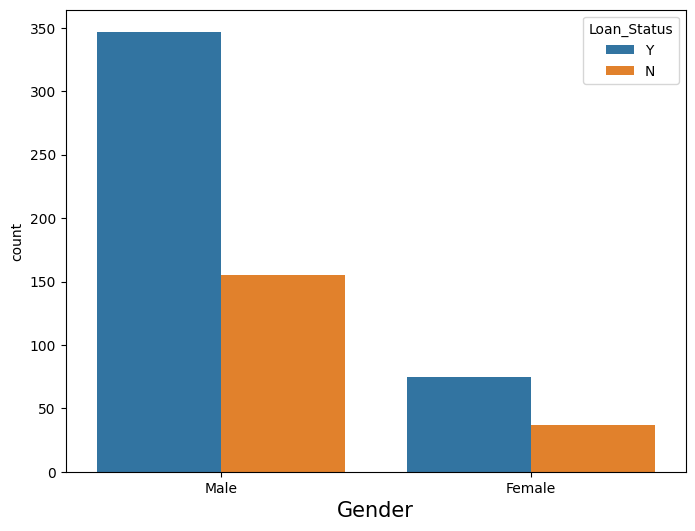

In [23]:
## Gender

plt.figure(figsize = (8,6))
sns.countplot(data=df,x='Gender',hue='Loan_Status')
plt.xlabel("Gender",fontsize = 15)
plt.show()

In [24]:
pd.crosstab(df.Married,df.Loan_Status)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288

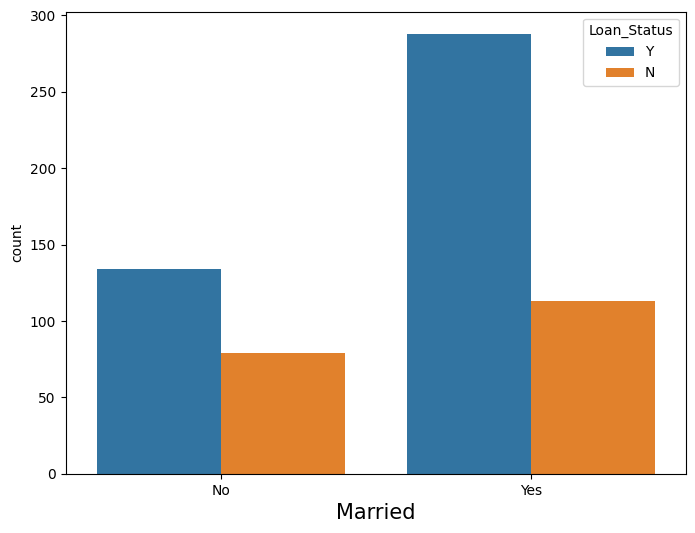

In [25]:
## Married

plt.figure(figsize = (8,6))
sns.countplot(data=df,x='Married',hue='Loan_Status')
plt.xlabel("Married",fontsize = 15)
plt.show()

In [26]:
pd.crosstab(df["Dependents"],df["Loan_Status"])

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33

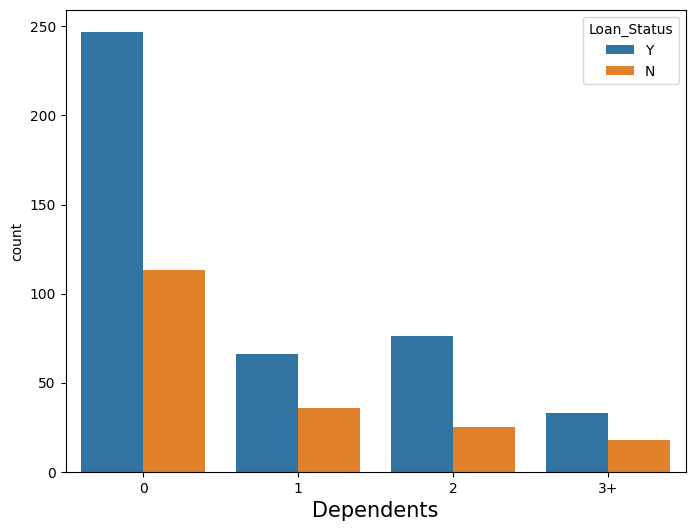

In [27]:
## Dependents

plt.figure(figsize = (8,6))
sns.countplot(data=df,x='Dependents',hue='Loan_Status')
plt.xlabel("Dependents",fontsize = 15)
plt.show()

In [28]:
pd.crosstab(df["Education"],df["Loan_Status"])

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

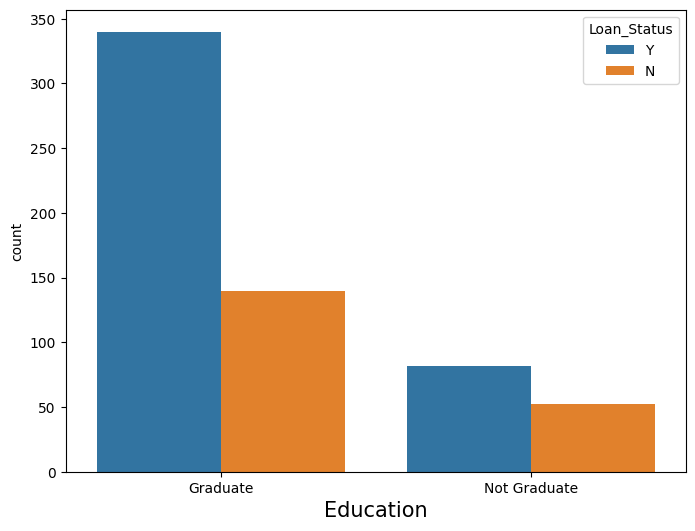

In [29]:
## Education

plt.figure(figsize = (8,6))
sns.countplot(data=df,x='Education',hue='Loan_Status')
plt.xlabel("Education",fontsize = 15)
plt.show()

#### **Gender (Loan Approval rate Gender wise)**

In [30]:
pd.crosstab(df["Gender"],df["Loan_Status"])

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347

In [31]:
x = pd.DataFrame(pd.crosstab(df.Gender,df.Loan_Status))

x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status    N    Y  Total  Approval_Rate
Gender                                     
Female        37   75    112      66.964286
Male         155  347    502      69.123506

**Result:** Approval Rate is not very significantly different for Male and Female almost it is Similar.

#### **Married (Loan Approval rate Married wise)**

In [32]:
pd.crosstab(df["Married"],df["Loan_Status"])

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288

In [33]:
x = pd.DataFrame(pd.crosstab(df.Married,df.Loan_Status))

x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status    N    Y  Total  Approval_Rate
Married                                    
No            79  134    213      62.910798
Yes          113  288    401      71.820449

**Result:** If you Married then there is a good chance of getting Loan Approved.(71% chance of getting Loan will Approved)

#### **Dependents (Loan Approval rate Dependents wise)**

In [34]:
pd.crosstab(df["Dependents"],df["Loan_Status"])

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33

In [35]:
x = pd.DataFrame(pd.crosstab(df.Dependents,df.Loan_Status))

x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status    N    Y  Total  Approval_Rate
Dependents                                 
0            113  247    360      68.611111
1             36   66    102      64.705882
2             25   76    101      75.247525
3+            18   33     51      64.705882

**Result:** We can see if you have 2 dependent then the Loan Approval Rate is 75%.(What Dependent 2 Indicates: He must be Married as well as he must have a child. Approval Rate is High) 

For 0 Dependent there is 68% Loan Approval Rate

For 1 Dependent there is 64% Loan Approval Rate

For 3+ Dependent there is 64% Loan Approval Rate

#### **Education (Loan Approval rate Education wise)**

In [36]:
pd.crosstab(df["Education"],df["Loan_Status"])

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82

In [37]:
x = pd.DataFrame(pd.crosstab(df.Education,df.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status     N    Y  Total  Approval_Rate
Education                                   
Graduate      140  340    480      70.833333
Not Graduate   52   82    134      61.194030

**Result:** Graduate having the higher chance of getting Loan Approval.

### Find Approval Rate for,

> Male Married

> Male Not-Married

> Female Married

> Female Not-Married

In [38]:
# df.groupby(["Gender","Married","Loan_Status"]).count()["Loan_ID"]
#a = pd.DataFrame(df.groupby(["Gender","Married","Loan_Status"]).count()["Loan_ID"])
#a

In [39]:
y = pd.DataFrame(df.groupby(["Gender","Married","Loan_Status"])["Loan_ID"].count())
y

Loan_ID
Gender Married Loan_Status         
Female No      N                 29
               Y                 51
       Yes     N                  8
               Y                 24
Male   No      N                 50
               Y                 83
       Yes     N                105
               Y                264

**Calculation:** Approval Rate for Female Not Married: 51/29+51

In [40]:
y = pd.DataFrame(df.groupby(["Gender","Married","Loan_Status"])["Loan_ID"].count()).reset_index()
#y = y.reset_index()
y

y["Key"] = y["Gender"] + y["Married"] 
y

Gender Married Loan_Status  Loan_ID        Key
0  Female      No           N       29   FemaleNo
1  Female      No           Y       51   FemaleNo
2  Female     Yes           N        8  FemaleYes
3  Female     Yes           Y       24  FemaleYes
4    Male      No           N       50     MaleNo
5    Male      No           Y       83     MaleNo
6    Male     Yes           N      105    MaleYes
7    Male     Yes           Y      264    MaleYes

In [41]:
z = pd.DataFrame(df.groupby(["Gender","Married"])["Loan_ID"].count()).reset_index()
z

z["Key"] = z["Gender"] + z["Married"]
z

Gender Married  Loan_ID        Key
0  Female      No       80   FemaleNo
1  Female     Yes       32  FemaleYes
2    Male      No      133     MaleNo
3    Male     Yes      369    MaleYes

In [42]:
temp = pd.merge(y,z,on = "Key",how = "left")
temp

Gender_x Married_x Loan_Status  Loan_ID_x        Key Gender_y Married_y  \
0   Female        No           N         29   FemaleNo   Female        No   
1   Female        No           Y         51   FemaleNo   Female        No   
2   Female       Yes           N          8  FemaleYes   Female       Yes   
3   Female       Yes           Y         24  FemaleYes   Female       Yes   
4     Male        No           N         50     MaleNo     Male        No   
5     Male        No           Y         83     MaleNo     Male        No   
6     Male       Yes           N        105    MaleYes     Male       Yes   
7     Male       Yes           Y        264    MaleYes     Male       Yes   

   Loan_ID_y  
0         80  
1         80  
2         32  
3         32  
4        133  
5        133  
6        369  
7        369

In [43]:
temp["Approval_Rate"] = temp["Loan_ID_x"]/temp["Loan_ID_y"]

temp = temp[temp["Loan_Status"] == "Y"]

temp[["Gender_x","Married_x","Approval_Rate"]]

Gender_x Married_x  Approval_Rate
1   Female        No       0.637500
3   Female       Yes       0.750000
5     Male        No       0.624060
7     Male       Yes       0.715447

### Find Approval Rate w.r.t **Education** for,

> Male Married

> Male Not-Married

> Female Married

> Female Not-Married

In [44]:
y = pd.DataFrame(df.groupby(["Gender","Married","Education","Loan_Status"])["Loan_ID"].count()).reset_index()
#y = y.reset_index()
y

y["Key"] = y["Gender"] + y["Married"] + y["Education"]
y

Gender Married     Education Loan_Status  Loan_ID                    Key
0   Female      No      Graduate           N       24       FemaleNoGraduate
1   Female      No      Graduate           Y       42       FemaleNoGraduate
2   Female      No  Not Graduate           N        5   FemaleNoNot Graduate
3   Female      No  Not Graduate           Y        9   FemaleNoNot Graduate
4   Female     Yes      Graduate           N        7      FemaleYesGraduate
5   Female     Yes      Graduate           Y       19      FemaleYesGraduate
6   Female     Yes  Not Graduate           N        1  FemaleYesNot Graduate
7   Female     Yes  Not Graduate           Y        5  FemaleYesNot Graduate
8     Male      No      Graduate           N       38         MaleNoGraduate
9     Male      No      Graduate           Y       64         MaleNoGraduate
10    Male      No  Not Graduate           N       12     MaleNoNot Graduate
11    Male      No  Not Graduate           Y       19     MaleNoNot Graduate
12    Male     Yes      Graduate           N       71        MaleYesGraduate
13    Male     Yes      Graduate           Y      215        MaleYesGraduate
14    Male     Yes  Not Graduate           N       34    MaleYesNot Graduate
15    Male     Yes  Not Graduate           Y       49    MaleYesNot Graduate

In [45]:
z = pd.DataFrame(df.groupby(["Gender","Married","Education"])["Loan_ID"].count()).reset_index()
z

z["Key"] = z["Gender"] + z["Married"] + z["Education"]
z

Gender Married     Education  Loan_ID                    Key
0  Female      No      Graduate       66       FemaleNoGraduate
1  Female      No  Not Graduate       14   FemaleNoNot Graduate
2  Female     Yes      Graduate       26      FemaleYesGraduate
3  Female     Yes  Not Graduate        6  FemaleYesNot Graduate
4    Male      No      Graduate      102         MaleNoGraduate
5    Male      No  Not Graduate       31     MaleNoNot Graduate
6    Male     Yes      Graduate      286        MaleYesGraduate
7    Male     Yes  Not Graduate       83    MaleYesNot Graduate

In [46]:
temp = pd.merge(y,z,on = "Key",how = "left")
temp

Gender_x Married_x   Education_x Loan_Status  Loan_ID_x  \
0    Female        No      Graduate           N         24   
1    Female        No      Graduate           Y         42   
2    Female        No  Not Graduate           N          5   
3    Female        No  Not Graduate           Y          9   
4    Female       Yes      Graduate           N          7   
5    Female       Yes      Graduate           Y         19   
6    Female       Yes  Not Graduate           N          1   
7    Female       Yes  Not Graduate           Y          5   
8      Male        No      Graduate           N         38   
9      Male        No      Graduate           Y         64   
10     Male        No  Not Graduate           N         12   
11     Male        No  Not Graduate           Y         19   
12     Male       Yes      Graduate           N         71   
13     Male       Yes      Graduate           Y        215   
14     Male       Yes  Not Graduate           N         34   
15     Male       Yes  Not Graduate           Y         49   

                      Key Gender_y Married_y   Education_y  Loan_ID_y  
0        FemaleNoGraduate   Female        No      Graduate         66  
1        FemaleNoGraduate   Female        No      Graduate         66  
2    FemaleNoNot Graduate   Female        No  Not Graduate         14  
3    FemaleNoNot Graduate   Female        No  Not Graduate         14  
4       FemaleYesGraduate   Female       Yes      Graduate         26  
5       FemaleYesGraduate   Female       Yes      Graduate         26  
6   FemaleYesNot Graduate   Female       Yes  Not Graduate          6  
7   FemaleYesNot Graduate   Female       Yes  Not Graduate          6  
8          MaleNoGraduate     Male        No      Graduate        102  
9          MaleNoGraduate     Male        No      Graduate        102  
10     MaleNoNot Graduate     Male        No  Not Graduate         31  
11     MaleNoNot Graduate     Male        No  Not Graduate         31  
12        MaleYesGraduate     Male       Yes      Graduate        286  
13        MaleYesGraduate     Male       Yes      Graduate        286  
14    MaleYesNot Graduate     Male       Yes  Not Graduate         83  
15    MaleYesNot Graduate     Male       Yes  Not Graduate         83

In [47]:
temp["Approval_Rate"] = temp["Loan_ID_x"]/temp["Loan_ID_y"]

temp = temp[temp["Loan_Status"] == "Y"]

temp[["Gender_x","Married_x","Education_x","Loan_ID_y","Approval_Rate"]]

Gender_x Married_x   Education_x  Loan_ID_y  Approval_Rate
1    Female        No      Graduate         66       0.636364
3    Female        No  Not Graduate         14       0.642857
5    Female       Yes      Graduate         26       0.730769
7    Female       Yes  Not Graduate          6       0.833333
9      Male        No      Graduate        102       0.627451
11     Male        No  Not Graduate         31       0.612903
13     Male       Yes      Graduate        286       0.751748
15     Male       Yes  Not Graduate         83       0.590361

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


### **Drop Loan_ID column from Data**
Loan_ID does not carry any significant information so we are droping this feature

In [49]:
# Drop Loan_ID from data 
df.drop(columns = ["Loan_ID"],axis=1,inplace=True) 

## **Separate Categorical and Numerical Features**

**1. Categorical Columns**

In [50]:
cat_col = [colm for colm in df.columns if df[colm].dtype == "O"]
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [51]:
df[cat_col].head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [52]:
df[cat_col].isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [53]:
Categorical = df[cat_col]
Categorical.head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [54]:
Categorical.shape

(614, 7)

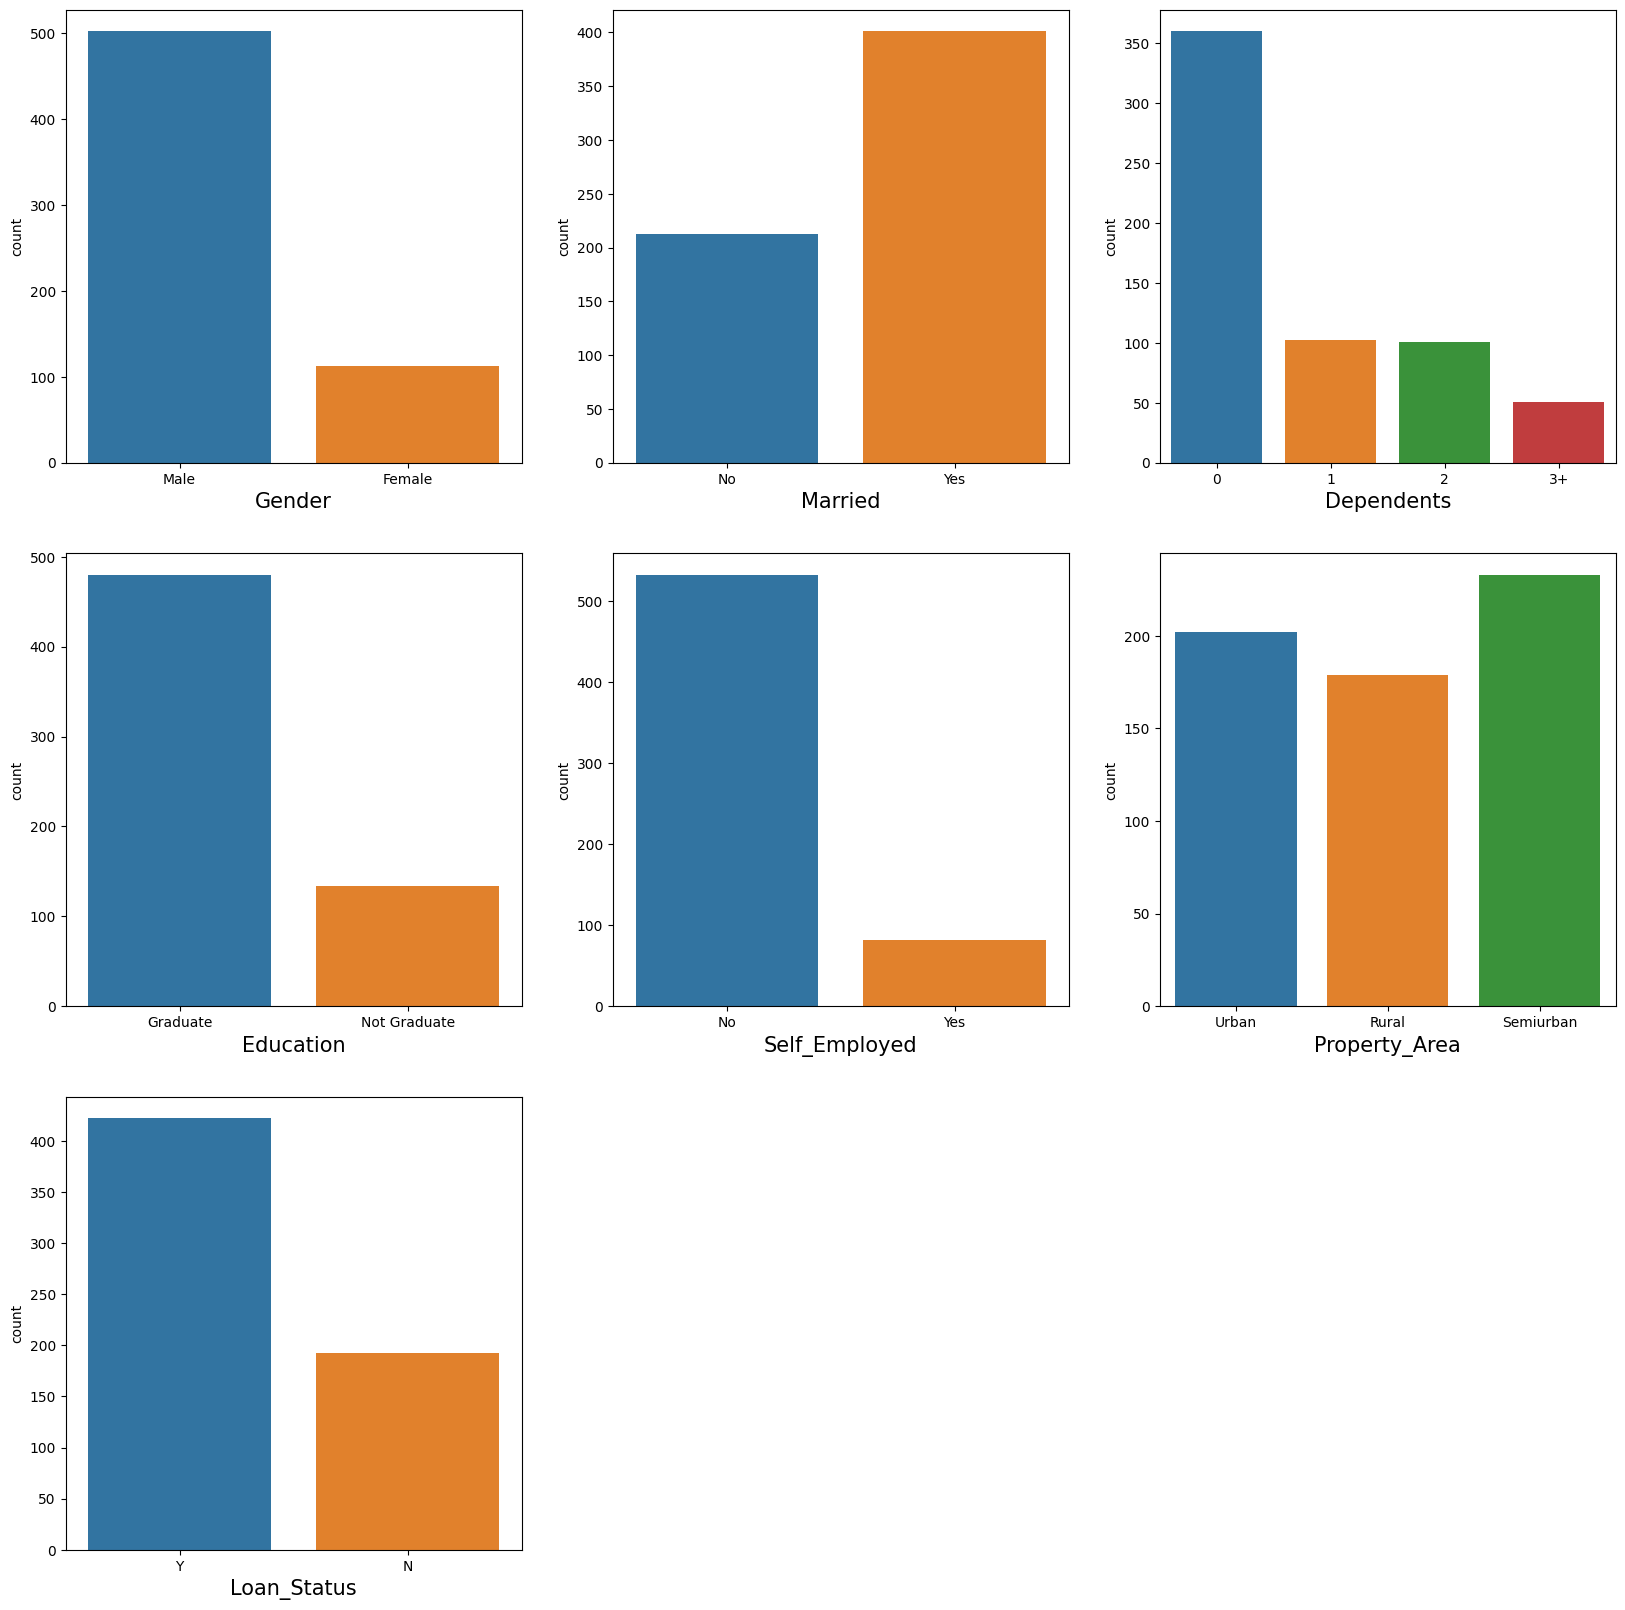

In [55]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in Categorical:
  if plotnumber <= 10:
    ax = plt.subplot(3,3,plotnumber)
    sns.countplot(x=column, data=Categorical)
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

#### **Encoding the categorical variables**

In [56]:
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']
cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [57]:
le = LabelEncoder()
for col in cols:
    Categorical[col] = le.fit_transform(Categorical[col])

In [58]:
Categorical.head()

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0       1        0           0          0              0              2   
1       1        1           1          0              0              0   
2       1        1           0          0              1              2   
3       1        1           0          1              0              2   
4       1        0           0          0              0              2   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [59]:
Categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         614 non-null    int64 
 1   Married        614 non-null    int64 
 2   Dependents     614 non-null    int64 
 3   Education      614 non-null    int64 
 4   Self_Employed  614 non-null    int64 
 5   Property_Area  614 non-null    int64 
 6   Loan_Status    614 non-null    object
dtypes: int64(6), object(1)
memory usage: 33.7+ KB


**2. Numerical Columns**

In [60]:
num_col = [clm for clm in df.columns if df[clm].dtype !="O"]
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total_Income']

In [61]:
df[num_col].head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Total_Income  
0             1.0        5849.0  
1             1.0        6091.0  
2             1.0        3000.0  
3             1.0        4941.0  
4             1.0        6000.0

In [62]:
df[num_col].shape

(614, 6)

In [63]:
df[num_col].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Total_Income         0
dtype: int64

In [64]:
Numerical_col = df[num_col]
Numerical_col.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Total_Income  
0             1.0        5849.0  
1             1.0        6091.0  
2             1.0        3000.0  
3             1.0        4941.0  
4             1.0        6000.0

In [65]:
Numerical_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Total_Income       614 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 28.9 KB


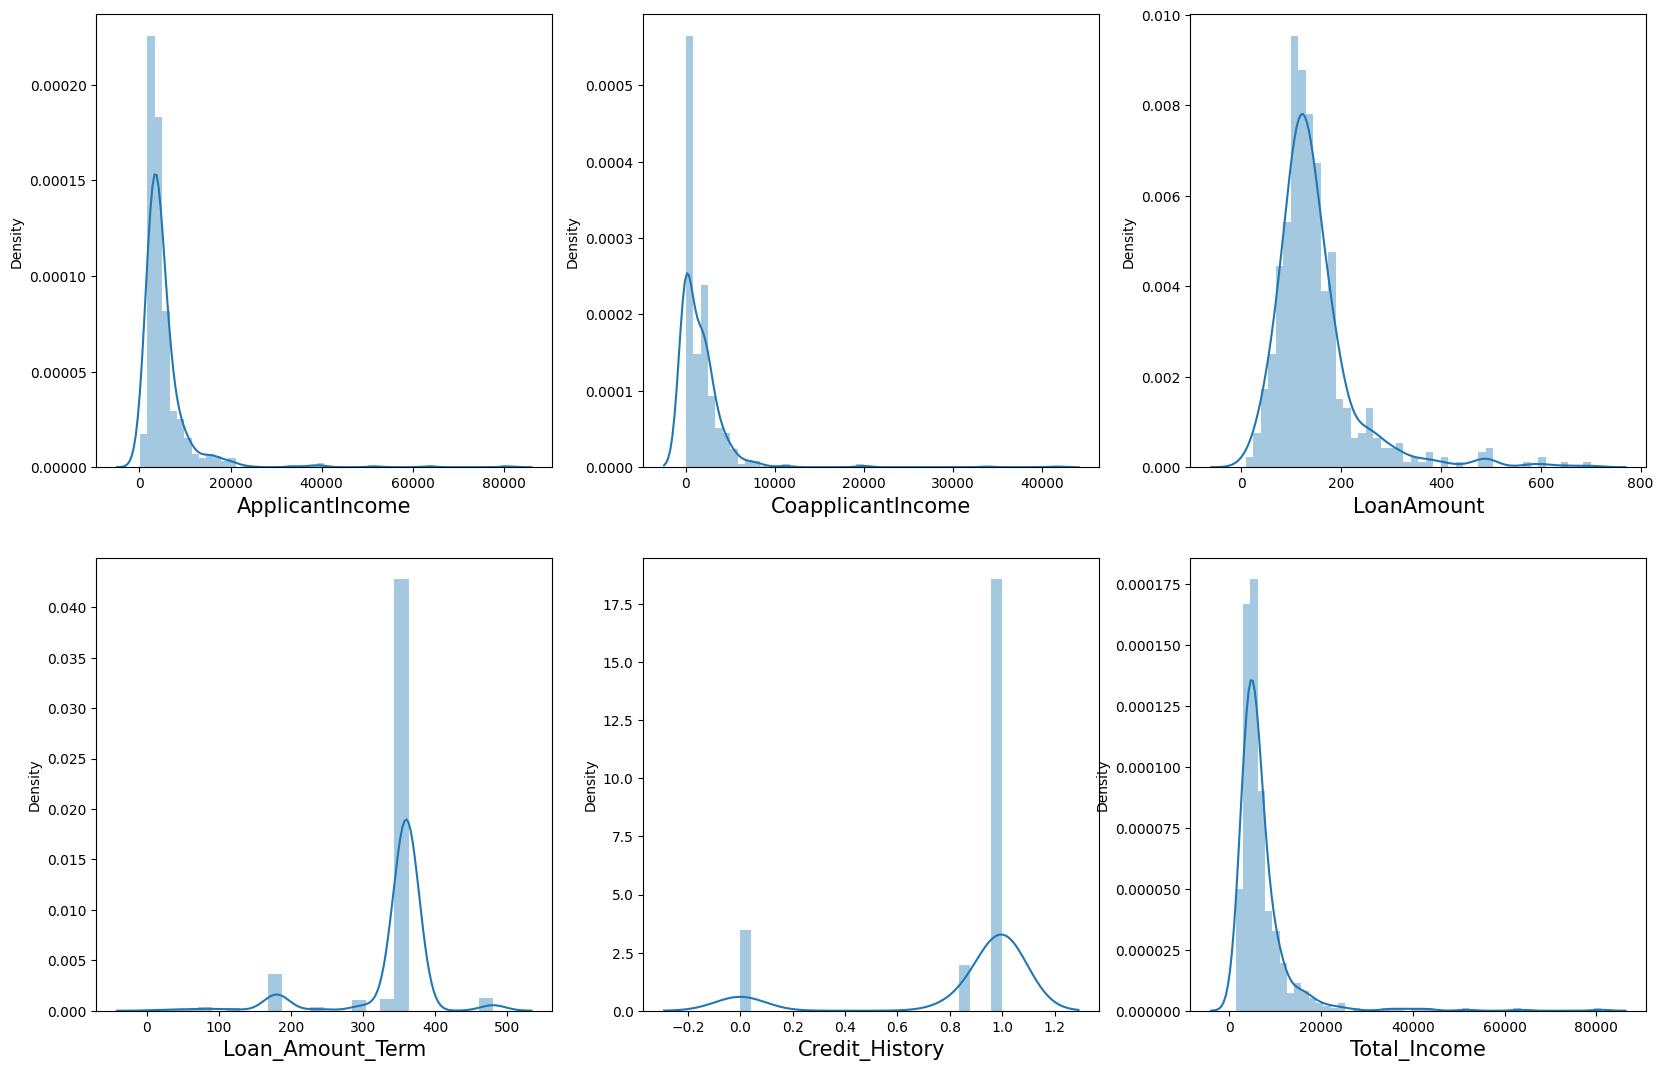

In [66]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in Numerical_col:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical_col[column])
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

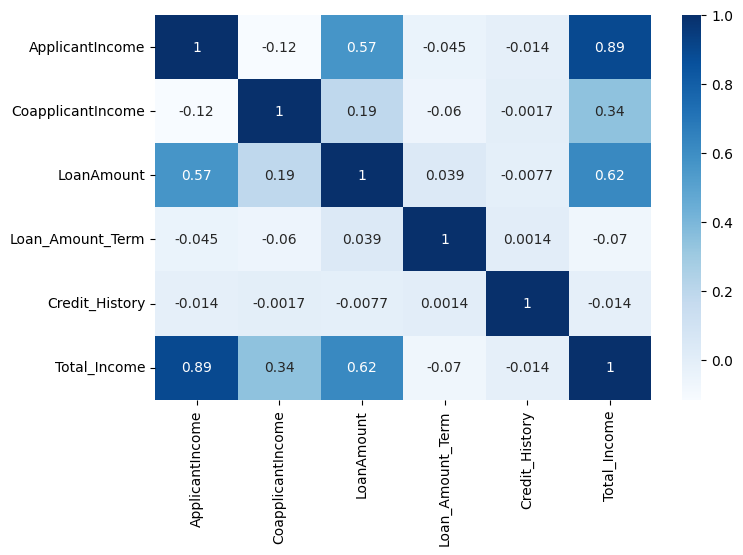

In [67]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='Blues',annot = True)
plt.show()

In [68]:
Numerical_col.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Total_Income  
0             1.0        5849.0  
1             1.0        6091.0  
2             1.0        3000.0  
3             1.0        4941.0  
4             1.0        6000.0

**Converting -> Loan_Amount_Term and Credit_History from float to string datatype**

In [69]:
''' Loan_Amount_Term 
(At initial it is in Float datatype but, [It should be in object datatype]) 
[It is not a continuous value(continous means it can take any values) ]
[Why it should be in Object Datatype -> Here Loan_Amount Term taking a discrete values most of the time it is 360,360,360]
'''

Numerical_col["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype("str")

In [70]:
''' Credit_History
(At initial it is in Float datatype but, [It should be in object datatype]) 
[It is not a continuous value(continous means it can take any values) ]
[Why it should be in Object Datatype -> Here Credit_History having only 0 and 1 values]
'''

Numerical_col["Credit_History"] = Numerical_col["Credit_History"].astype("str")

In [71]:
Numerical_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    object 
 4   Credit_History     614 non-null    object 
 5   Total_Income       614 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 28.9+ KB


#### **Encoding the Loan_Amount_Tern and Credit_History variables**

In [72]:
cols = ["Loan_Amount_Term","Credit_History"]

for col in cols:
  Numerical_col[col] = le.fit_transform(Numerical_col[col])

In [73]:
Numerical_col.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162                 7   
1             4583             1508.0  128.000000                 7   
2             3000                0.0   66.000000                 7   
3             2583             2358.0  120.000000                 7   
4             6000                0.0  141.000000                 7   

   Credit_History  Total_Income  
0               2        5849.0  
1               2        6091.0  
2               2        3000.0  
3               2        4941.0  
4               2        6000.0

In [74]:
Numerical_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    int64  
 4   Credit_History     614 non-null    int64  
 5   Total_Income       614 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 28.9 KB


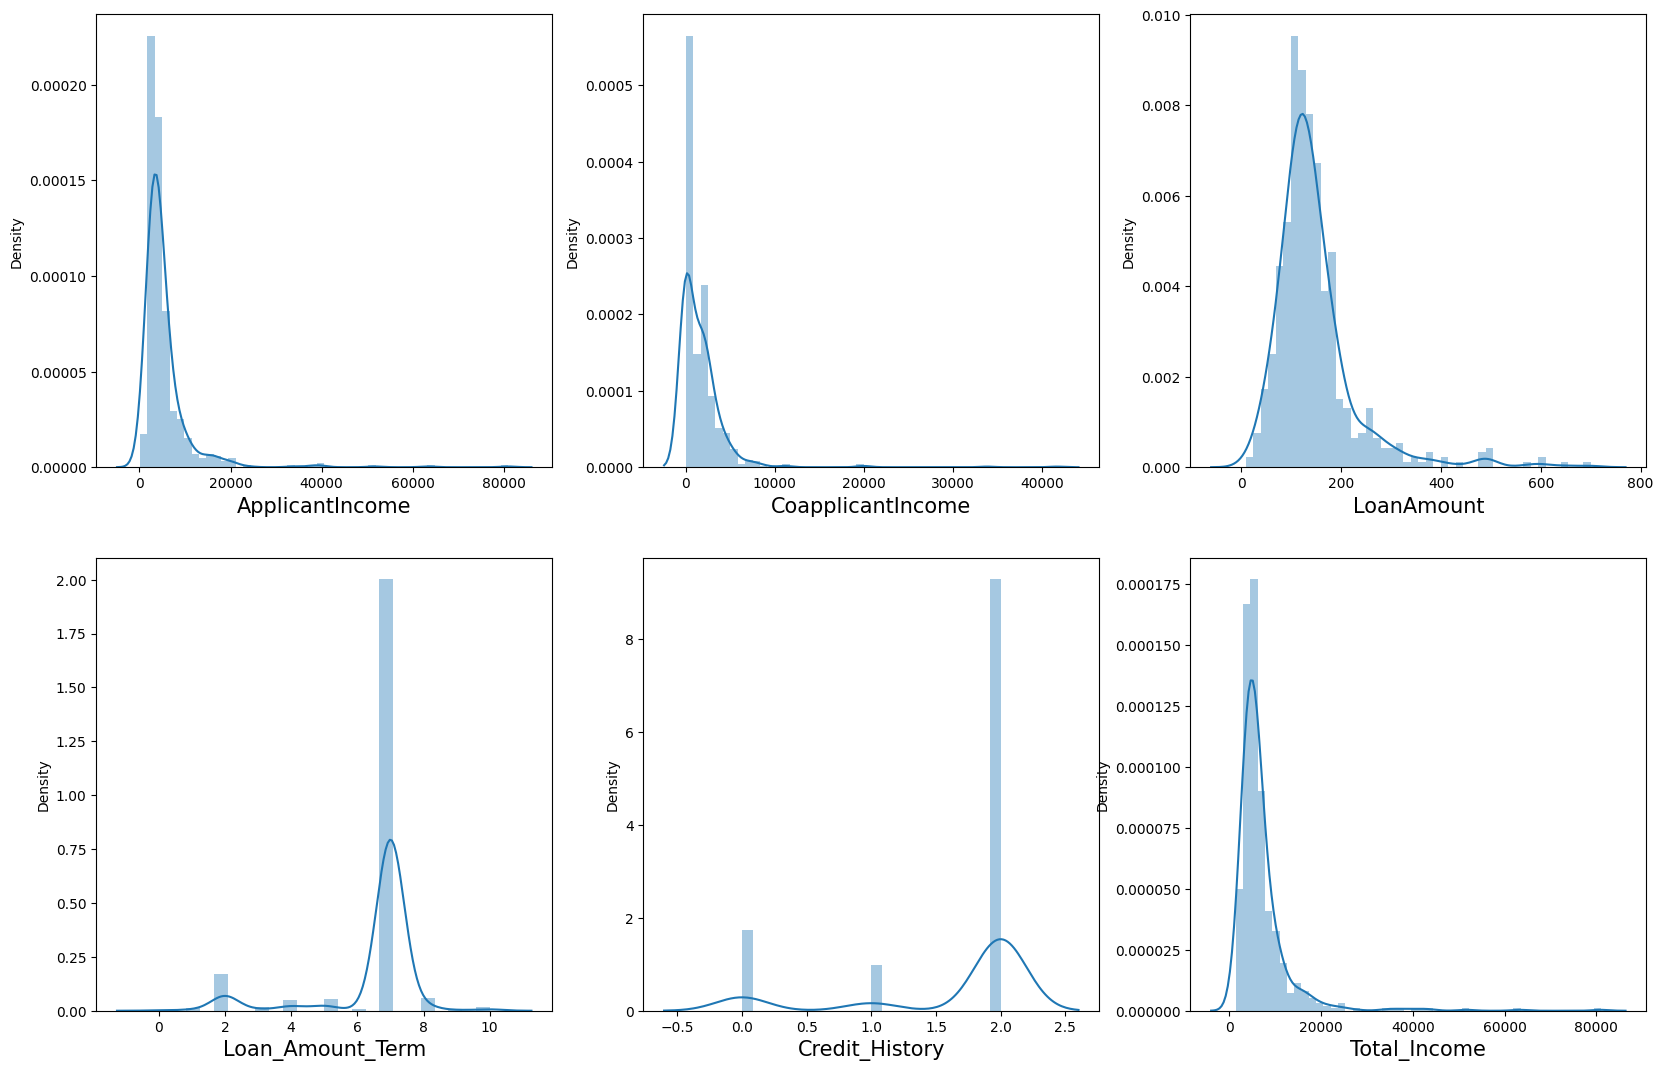

In [75]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in Numerical_col:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical_col[column])
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

### **Concatenate Categorical and Numerical**

In [76]:
data = pd.concat([Categorical,Numerical_col],axis =1)
data.head()

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0       1        0           0          0              0              2   
1       1        1           1          0              0              0   
2       1        1           0          0              1              2   
3       1        1           0          1              0              2   
4       1        0           0          0              0              2   

  Loan_Status  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           Y             5849                0.0  146.412162   
1           N             4583             1508.0  128.000000   
2           Y             3000                0.0   66.000000   
3           Y             2583             2358.0  120.000000   
4           Y             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Total_Income  
0                 7               2        5849.0  
1                 7               2        6091.0  
2                 7               2        3000.0  
3                 7               2        4941.0  
4                 7               2        6000.0

**Loan_Status**
> Yes - 1 

> No - 0

In [77]:
data.shape

(614, 13)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   Property_Area      614 non-null    int64  
 6   Loan_Status        614 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    int64  
 11  Credit_History     614 non-null    int64  
 12  Total_Income       614 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 62.5+ KB


**Split Independent and Dependent Features**

In [79]:
X = data.drop(columns = ["Loan_Status"],axis = 1)
y = data["Loan_Status"] 

In [80]:
X.head()

Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0       1        0           0          0              0              2   
1       1        1           1          0              0              0   
2       1        1           0          0              1              2   
3       1        1           0          1              0              2   
4       1        0           0          0              0              2   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162                 7   
1             4583             1508.0  128.000000                 7   
2             3000                0.0   66.000000                 7   
3             2583             2358.0  120.000000                 7   
4             6000                0.0  141.000000                 7   

   Credit_History  Total_Income  
0               2        5849.0  
1               2        6091.0  
2               2        3000.0  
3               2        4941.0  
4               2        6000.0

In [81]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

**Feature Scaling**

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
X_scaled

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.32141824,
         0.51330005, -0.18218376],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.32141824,
         0.51330005, -0.14468416],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.32141824,
         0.51330005, -0.62365632],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.32141824,
         0.51330005,  0.19947539],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.32141824,
         0.51330005,  0.08651172],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.32141824,
        -2.251316  , -0.37835935]])

### **VIF**

In [84]:
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns


In [85]:
vif

VIF           Features
0   1.172812             Gender
1   1.281708            Married
2   1.158407         Dependents
3   1.072790          Education
4   1.022517      Self_Employed
5   1.019637      Property_Area
6        inf    ApplicantIncome
7        inf  CoapplicantIncome
8   1.709607         LoanAmount
9   1.064681   Loan_Amount_Term
10  1.013886     Credit_History
11       inf       Total_Income

**Splitting the data for training and Testing**

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =20, random_state=10)

In [87]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (594, 12)
Shape of X Test:  (20, 12)
Shape of y Train:  (594,)
Shape of y Test:  (20,)


### **Model Building**

### **Decision Tree**

In [88]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth = 3 , min_samples_leaf = 50)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50)

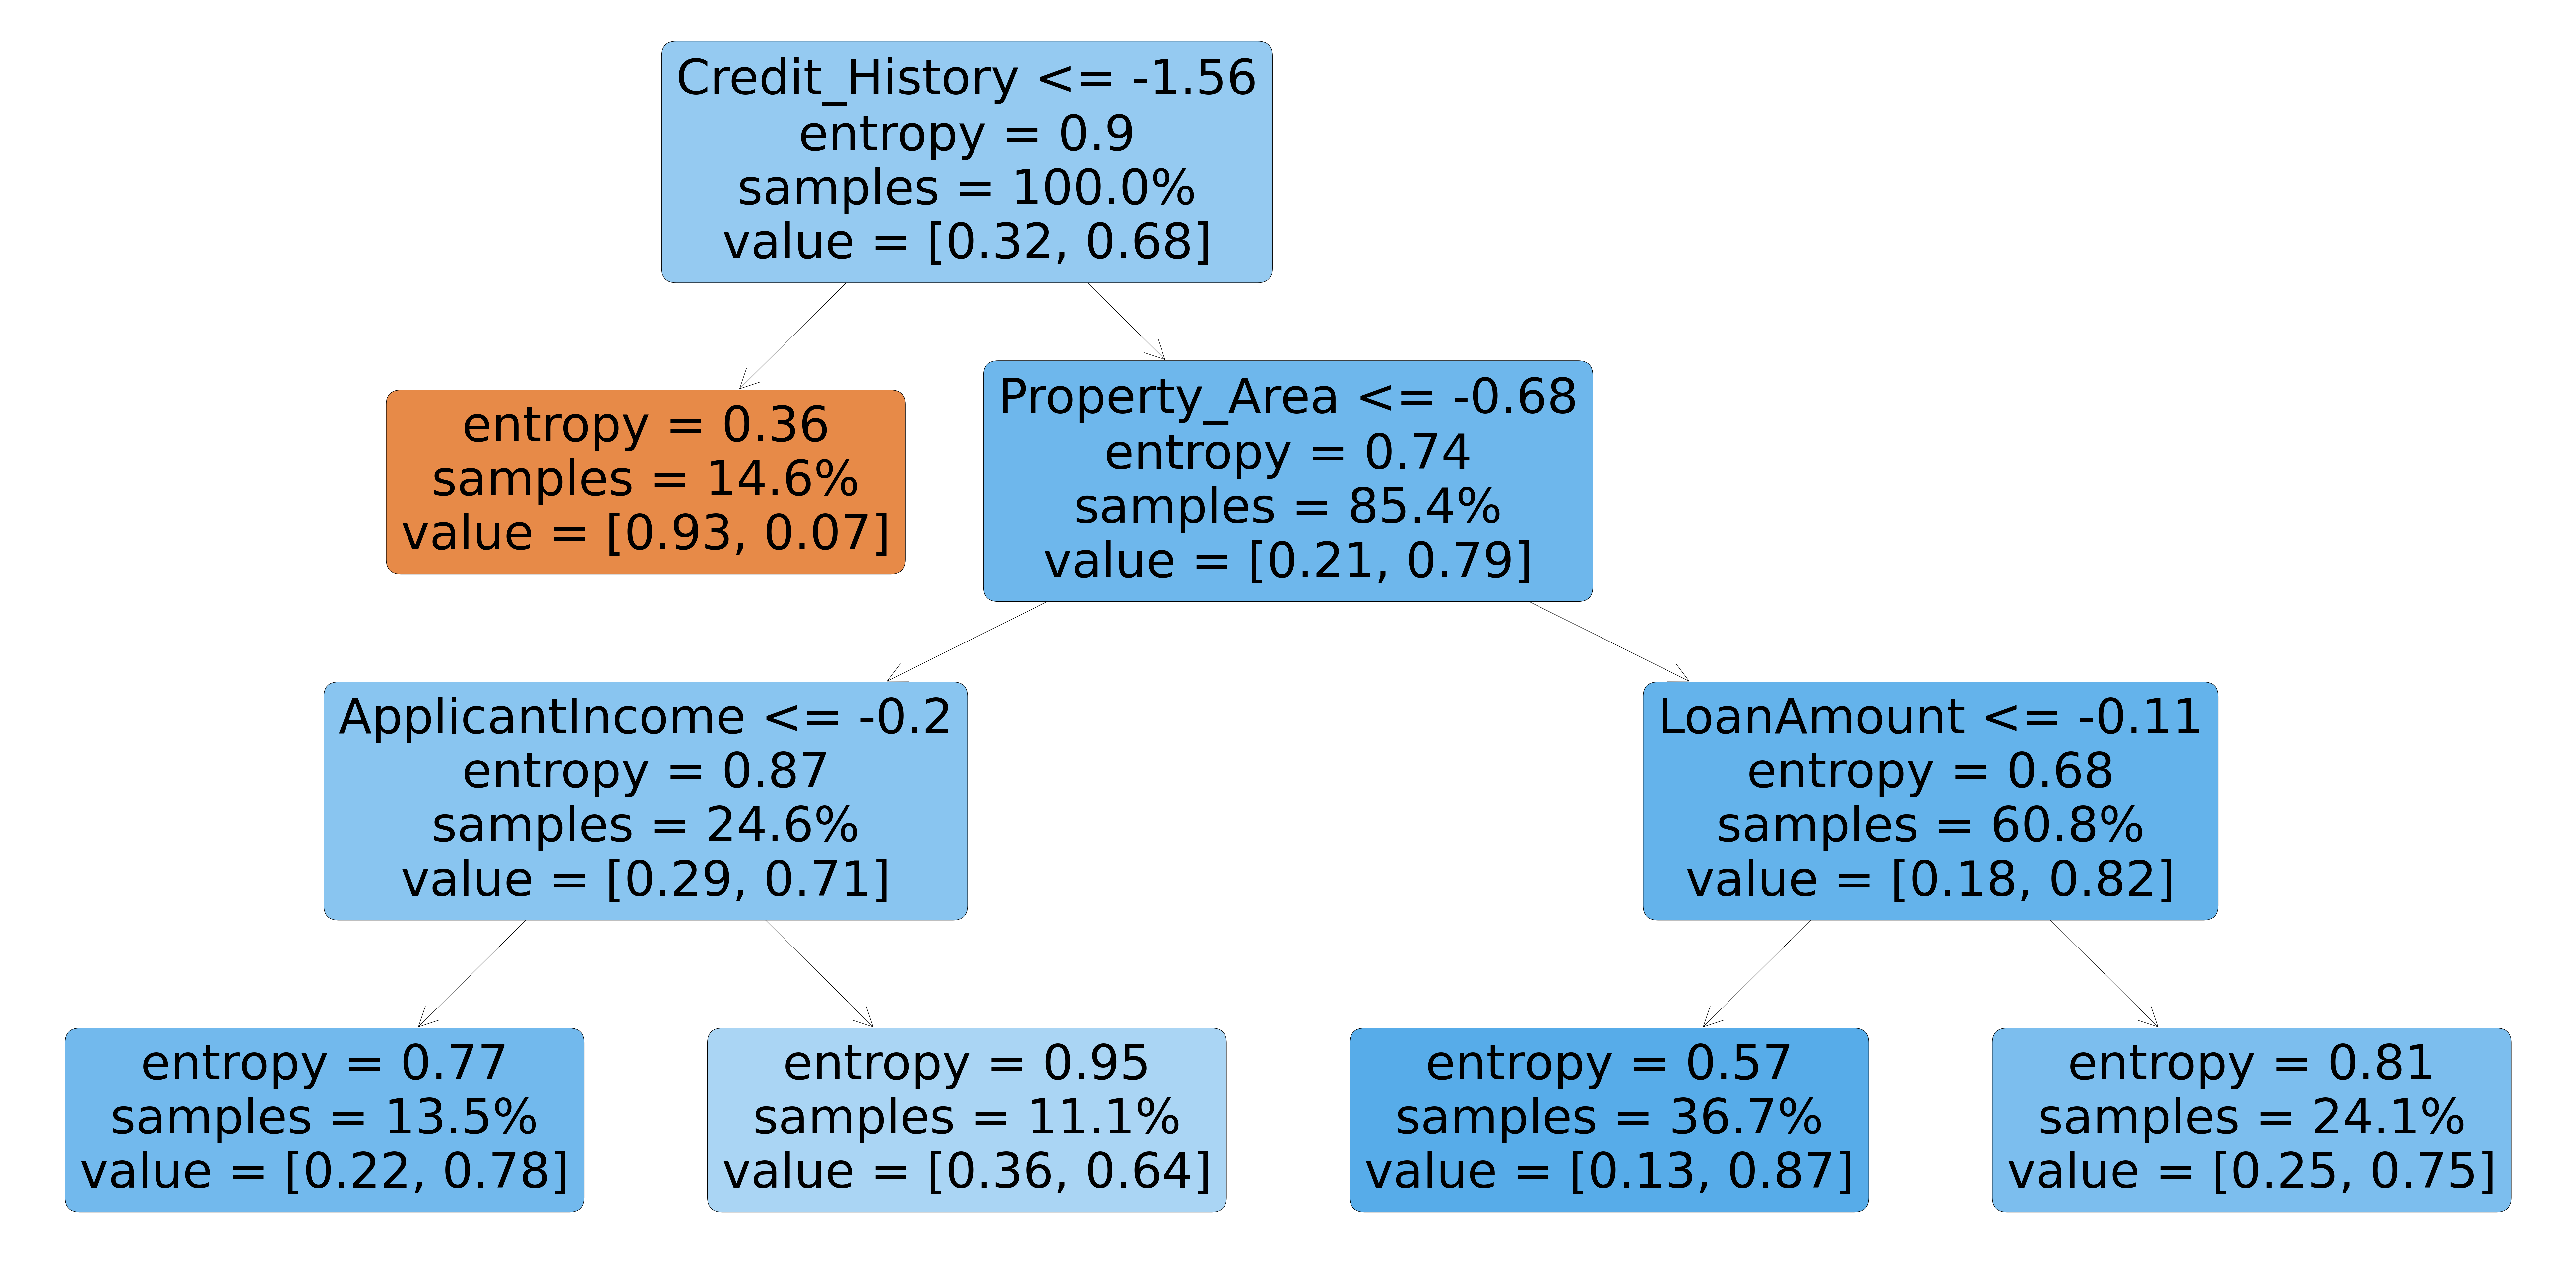

In [89]:
%matplotlib inline

plt.figure(figsize=(100,50))

from sklearn.tree import plot_tree 

a = plot_tree(decision_tree= model1,feature_names = X.columns , filled = True , precision = 2 , rounded = True,proportion=True)

Rule / Insight 
1. if the credit history is not present in that case loan rejection rate is 93 percent 
2. if the credit history is present in that case loan approval rate is 79 percent 


**Property Area**

3 - semiurban 

2 - rural  

1 - urban 

In [90]:
y_pred = model1.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [91]:
# Accuracu of the Model

print("Accuracy_Score for DTC: ", round(accuracy_score(y_test,y_pred)*100,3),"%")

Accuracy_Score for DTC:  80.0 %


In [92]:
# Comparing Actiual value and Predicted value

df1 = pd.DataFrame({"Actual Value" : y_test,
                    "Predicted Value": y_pred})
df1.head(20)

Actual Value Predicted Value
285            Y               Y
323            Y               Y
482            Y               Y
173            Y               Y
518            N               Y
193            Y               Y
211            N               N
97             Y               Y
140            N               Y
566            Y               Y
278            Y               Y
389            Y               Y
467            Y               Y
240            Y               Y
326            Y               N
386            Y               Y
271            Y               Y
292            Y               Y
197            Y               Y
152            N               Y

### **Implementing GridSearchCV**

In [93]:
param_grid = {
    "criterion": ["gini","entropy"],
    "max_depth": range(2,30,1),
    "min_samples_leaf": range(1,50,1),
    "min_samples_split": range(2,10,1),
    "splitter": ["best","random"]
}

In [94]:
grid_search = GridSearchCV(estimator = model1,param_grid = param_grid,verbose = 3,n_jobs=-1)

In [95]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 43904 candidates, totalling 219520 fits


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30),
                         'min_samples_leaf': range(1, 50),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [97]:
best_parameter = grid_search.best_params_
best_parameter

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 6,
 'splitter': 'random'}

In [98]:
clf1 = DecisionTreeClassifier(criterion = "gini",max_depth = 3,min_samples_leaf = 11,min_samples_split = 6,splitter =  "random")

In [99]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=6,
                       splitter='random')

In [100]:
y_pred1 = clf1.predict(X_test)

In [101]:
# Accuracu of the Model

print("Accuracy_Score After GridsearchCV for DTC: ", round(accuracy_score(y_test,y_pred1)*100,3),"%")

Accuracy_Score After GridsearchCV for DTC:  80.0 %


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### **Logistic Regression**

In [103]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
     

LogisticRegression()

In [104]:
y_pred = log_reg.predict(X_test)
y_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [105]:
print(accuracy_score(y_pred,y_test))

0.75


### **Random Forest**

In [106]:
Rmd_For = RandomForestClassifier()
Rmd_For.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
y_pred = Rmd_For.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [108]:
print(accuracy_score(y_pred,y_test))

0.8


**References:**
1. https://www.kaggle.com/code/rupamshil/loan-prediction-using-machine-learning/input

2.  **https://github.com/Kalebu/Loan-prediction-with-ML**